In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data

In [5]:
np.random.seed(0) # fix seed for reproducibility.

mean = [-1, 1] # mean of normal distribution. Try others.
cov = [[1, -0.75], 
       [-0.75, 1]] # covariance of normal distribution
sample = np.random.multivariate_normal(mean, cov, size=1000) # 1000 normally distributed samples

In [56]:
sample

array([[-1.50864293,  2.79159681],
       [-0.12325016,  2.70780094],
       [-2.09246045,  2.40142063],
       ...,
       [ 3.        ,  4.        ],
       [ 0.        ,  5.        ],
       [ 2.        ,  2.        ]])

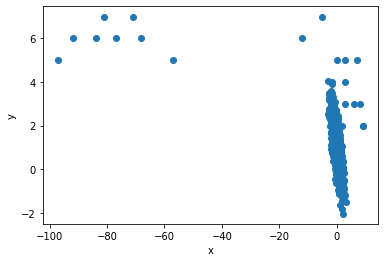

In [57]:
x, y = sample[:, 0], sample[:, 1]  # separate samples on feature x and target y

# Visualize dataset
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [58]:
# Add singular bias feature
X = np.array([np.array([1, val]) for val in x])
X[:5], y[:5] # show X, y head

(array([[ 1.        , -1.50864293],
        [ 1.        , -0.12325016],
        [ 1.        , -2.09246045],
        [ 1.        , -0.94223919],
        [ 1.        ,  0.24172089]]),
 array([2.79159681, 2.70780094, 2.40142063, 1.83521348, 1.0486161 ]))

In [59]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
model.coef_ # only theta[1:] here

array([ 0.        , -0.07385177])

In [61]:
model.intercept_ # theta[0] is called "intercept" in sklearn

1.0083736346609102

In [62]:
w = np.array([model.intercept_, model.coef_[1]]) # to visualize it in usual way

In [63]:
def predict(X, theta):
    return np.dot(X, theta)

In [64]:
def computeCost(X, y, theta):
    return sum((y - predict(X, theta))**2) / (2 * len(X))

In [65]:
print("Model's cost: ", computeCost(X, y, w))
print("Calculated weights: ", w)

Model's cost:  0.4885541621772246
Calculated weights:  [ 1.00837363 -0.07385177]


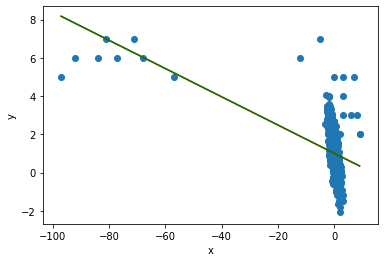

In [66]:
extremes = np.array([np.min(x), np.max(x)])
line =  model.predict(np.array([[1, val] for val in extremes]))#w[0] + extremes * w[1]
line2 = w[0] + extremes * w[1]

plt.plot(extremes, line, 'r-', extremes, line2, 'g-')
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

There is no model's trajectory or learning process visualization because sklearn learns linear models in closed form, solving [normal equation](http://mlwiki.org/index.php/Normal_Equation)

# Let`s try to use linear regression for normalized normal distribution, and data with emissions 

## Generate normalized normal distr

In [67]:
np.random.seed(0) # fix the seed for reproducibility

mean = [0, 1] # mean of normal  distribution. Try others
cov = [[1, -0.75],
       [-0.75, 1]] # covariance of normal distribution

sample = np.random.multivariate_normal(mean, cov, size = 1000) # 1000 normally distributed samples

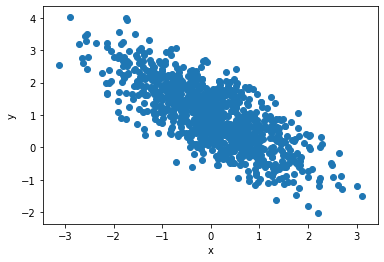

In [68]:
x, y = sample[:, 0], sample[:, 1]  # separate samples on feature x and target y

# Visualize dataset
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [69]:
# Add singular bias feature
X = np.array([np.array([1, val]) for val in x])
X[:5], y[:5] # show X, y head

(array([[ 1.        , -1.50864293],
        [ 1.        , -0.12325016],
        [ 1.        , -2.09246045],
        [ 1.        , -0.94223919],
        [ 1.        ,  0.24172089]]),
 array([2.79159681, 2.70780094, 2.40142063, 1.83521348, 1.0486161 ]))

In [70]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, y)
w = np.array([model.intercept_, model.coef_[1]]) # to visualize it in usual way
print("Model's cost: ", computeCost(X, y, w))
print("Calculated weights: ", w)
nnd_lr_cost = computeCost(X, y, w)
nnd_lr_weights = w

Model's cost:  0.20846219875580643
Calculated weights:  [ 0.98861851 -0.73984059]


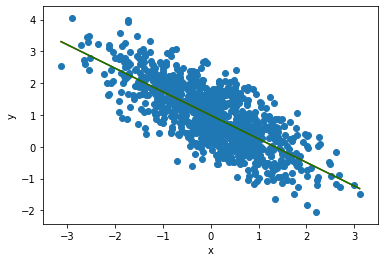

In [71]:
extremes = np.array([np.min(x), np.max(x)])
line =  model.predict(np.array([[1, val] for val in extremes]))#w[0] + extremes * w[1]
line2 = w[0] + extremes * w[1]

plt.plot(extremes, line, 'r-', extremes, line2, 'g-')
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Read data from HW-1-with-normalized-nd

In [81]:
%store -r sgd_iters_nnd 
%store -r gd_cost_nnd
%store -r sgd_cost_nnd
%store -r gd_iters_nnd
%store -r sgd_iters_nnd
%store -r gd_alpha_nnd
%store -r sgd_alpha_nnd
%store -r gd_batch_size_nnd
%store -r sgd_batch_size_nnd
%store -r gd_weights_nnd
%store -r sgd_weights_nnd

In [82]:
import pandas as pd

models = {'Cost_func_val': [gd_cost_nnd, sgd_cost_nnd, nnd_lr_cost],
        'Iters_count': [gd_iters_nnd, sgd_iters_nnd, '-'],
        'Alpha': [gd_alpha_nnd, sgd_alpha_nnd, '-'],
        'Batch_size': [gd_batch_size_nnd, sgd_batch_size_nnd, '-'],
         'Weights': [gd_weights_nnd, sgd_weights_nnd, nnd_lr_weights]}

df = pd.DataFrame(models, columns = ['Cost_func_val','Iters_count', 'Alpha','Batch_size', 'Weights'], index=['GD','SGD', 'LR'])
print(df)


     Cost_func_val Iters_count  Alpha Batch_size  \
GD        0.208719          10  0.001       1000   
SGD       0.208719         800  0.001         10   
LR        0.208462           -      -          -   

                                       Weights  
GD   [1.0112470649159544, -0.7411783567778351]  
SGD  [1.0112470649159544, -0.7411783567778351]  
LR   [0.9886185057301692, -0.7398405932686568]  


## Conclusion after using Gradient Descent, Stochastic Gradient Descent and Linear regression for 
- ## normalized normal distribution

If we have not a bid dataset `GD` - good method to use. But if we have big dataset better to use `SGD` because it learns though batches not thought all dataset. As the result we use less capacity and time on learning. 

By using `SGD` we need to choose not only count of iter and alpha, we need to find balance between batch sizes for lowwer value of cost function.

`GD` we can try use once on big dataset(depends on our computation capacity) for having base optimal cost func value to estimate quickier methods like `SGD` and other. (or we can try to use `LR` but it has limitations, described below)

`LR` more accurate method. `LR` don't need to choose α, don't need to iterate - computed in one step. 

But `LR` slow if n is large (n⩾10^4), need to compute (X^TX)^−1 - very slow, if (X^TX) is not-invertible - we have problems.

For normalized normal distribution `GD`, `SGD` and `LR` are good methods if we follow the rules of use.

Concepts 'bid dataset', 'not bid dataset'' depend of our memory, GPU, CPU, ect. limitations

# Add abnormal data


In [83]:
np.random.seed(0) # fix seed for reproducibility.

mean = [-1, 1] # mean of normal distribution. Try others.
cov = [[1, -0.75], 
       [-0.75, 1]] # covariance of normal distribution
sample = np.random.multivariate_normal(mean, cov, size=1000) # 1000 normally distributed samples

In [84]:
# 5 new points 
new_array = np.random.randint([-100, 5],[-4, 8], size=(5,2))
sample = np.append(sample, new_array, axis = 0)
# 5 new points 
new_array = np.random.randint([0, 2],[10, 6], size=(5,2))
sample = np.append(sample, new_array, axis = 0)
sample

array([[-2.50864293,  2.79159681],
       [-1.12325016,  2.70780094],
       [-3.09246045,  2.40142063],
       ...,
       [ 9.        ,  2.        ],
       [ 7.        ,  5.        ],
       [ 6.        ,  3.        ]])

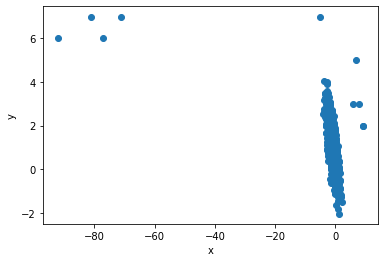

In [85]:
x, y = sample[:, 0], sample[:, 1]  # separate samples on feature x and target y

# Visualize dataset
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [86]:
# Add singular bias feature
X = np.array([np.array([1,val]) for val in x])
X[:5], y[:5]

(array([[ 1.        , -2.50864293],
        [ 1.        , -1.12325016],
        [ 1.        , -3.09246045],
        [ 1.        , -1.94223919],
        [ 1.        , -0.75827911]]),
 array([2.79159681, 2.70780094, 2.40142063, 1.83521348, 1.0486161 ]))

In [87]:
X.shape, y.shape

((1010, 2), (1010,))

In [88]:
model = linear_model.LinearRegression()
model.fit(X, y)
w = np.array([model.intercept_, model.coef_[1]]) # to visualize it in usual way
print("Model's cost: ", computeCost(X, y, w))
print("Calculated weights: ", w)
ad_lr_cost = computeCost(X, y, w)
ad_lr_weights = w

Model's cost:  0.4524529337344313
Calculated weights:  [ 0.90166332 -0.08934726]


### Read data from HW-1-with-abnormal-data-0

In [93]:
%store -r sgd_iters_ad 
%store -r gd_cost_ad 
%store -r sgd_cost_ad 
%store -r gd_iters_ad 
%store -r sgd_iters_ad 
%store -r gd_alpha_ad 
%store -r sgd_alpha_ad 
%store -r gd_batch_size_ad 
%store -r sgd_batch_size_ad 
%store -r gd_weights_ad 
%store -r sgd_weights_ad 

In [94]:
models = {'Cost_func_val': [gd_cost_ad , sgd_cost_ad , ad_lr_cost],
        'Iters_count': [gd_iters_ad , sgd_iters_ad , '-'],
        'Alpha': [gd_alpha_ad , sgd_alpha_ad , '-'],
        'Batch_size': [gd_batch_size_ad , sgd_batch_size_ad , '-'],
         'Weights': [gd_weights_ad , sgd_weights_ad , ad_lr_weights]}

df = pd.DataFrame(models, columns = ['Cost_func_val','Iters_count', 'Alpha','Batch_size', 'Weights'], index=['GD','SGD', 'LR'])
print(df)


     Cost_func_val Iters_count   Alpha Batch_size  \
GD        0.454099         800   1e-05       1010   
SGD       0.453728        5000  0.0001         10   
LR        0.452453           -       -          -   

                                        Weights  
GD   [0.9577508559447584, -0.09022937034478792]  
SGD  [0.9495246661537474, -0.09092906707091226]  
LR   [0.9016633161199756, -0.08934725788405362]  


## Conclusion after using Gradient Descent, Stochastic Gradient Descent and Linear regression for
- ## normalized normal distribution with abnormal data

If data contains abnormal data:
- cost function become difficult for minimization by gradient descent
by still we can try to choose count of iterations and step of GD and try to find min value of cost func

GD is trying to understand emissions as the result we have bad general predictions that was better with clean normal distribution.

For escaping that - before modeling we need clean data from abnormal data(and normalize in real life, because when we have more than one feature thay can be it different range)

SGD still demands less computation capacity. Even if we need more iters, we use less data for learning.


If data contains abnormal data in `big` range:
- GD demands less alpha(look at HW-1-with-abnormal-data-0) 

- SGD demands less bathes 

Tests with abnormal data in `not big` range shown in HW-1-with-abnormal-data-1.ipynb, HW-1-with-abnormal-data-2.ipynb

## Files on google drive

[HW-1-with-normalized-nd](https://drive.google.com/drive/u/1/folders/1j5tREyRHDWfLRtNlc64wuJd1D3U2r2zw)

[HW-1-with-abnormal-data-0](https://drive.google.com/drive/u/1/folders/1j5tREyRHDWfLRtNlc64wuJd1D3U2r2zw)

[HW-1-with-abnormal-data-1](https://drive.google.com/drive/u/1/folders/1j5tREyRHDWfLRtNlc64wuJd1D3U2r2zw)

[HW-1-with-abnormal-data-2](https://drive.google.com/drive/u/1/folders/1j5tREyRHDWfLRtNlc64wuJd1D3U2r2zw)

## Files on GitHub

[HW-1-with-normalized-nd](https://github.com/halynavs/gl-ml-basecamp/blob/hw-1/HW-1-with-normalized-nd.ipynb)

[HW-1-with-abnormal-data-0](https://github.com/halynavs/gl-ml-basecamp/blob/hw-1/HW-1-with-abnormal-data-0.ipynb)

[HW-1-with-abnormal-data-1](https://github.com/halynavs/gl-ml-basecamp/blob/hw-1/HW-1-with-abnormal-data-1.ipynb)

[HW-1-with-abnormal-data-2](https://github.com/halynavs/gl-ml-basecamp/blob/hw-1/HW-1-with-abnormal-data-2.ipynb)


Files are include preliminary conclusions at the end 